In [77]:
from numbers import Number
from typing import Union

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [0, 1, 1]
w = [-10, 10, 5]

In [127]:
def mul_1(x1: list, x2: list) -> list:
    assert len(x1) == len(x2), "Length mismatch"

    z = []
    for i, j in zip(x1, x2):
        z.append(i * j)
    return z    

In [4]:
mul_1(x, w)

[0, 10, 5]

In [128]:
# assert error
mul_1(x, w[:-1])

AssertionError: Length mismatch

In [40]:
# define type hinting
numeric = Union[int, float, np.number]

In [39]:


def dot(x1: list, x2: list) -> numeric:
    assert len(x1) == len(x2)
    s = 0

    for i, j in zip(x1, x2):
        s += i * j

    return s  


dot([1,2,3.5], [3,4,5])      

28.5

In [11]:
x_1 = range(1000000)
w_1 = range(2000000, 3000000) 

In [14]:
%%timeit
mul_1(x_1, w_1)

63.4 ms ± 905 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
def mul_2(x1: list, x2: list) -> list:
    assert len(x1) == len(x2), "Lenght mismatch"

    s = [0] * 1000000

    for i in range(len(x1)):
        s[i] = x1[i] * x2[i]

    return s    

In [21]:
%%timeit
mul_2(x_1, w_1)

130 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
def mul_3(x1: list, x2: list) -> list:
    assert len(x1) == len(x2), "Lenght mismatch"

    s = []

    for i in range(len(x1)):
        s.append(x1[i] * x2[i])

    return s    

In [22]:
%%timeit
mul_3(x_1, w_1)

140 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
def linear_neuron(x: list, w: list, b: numeric) -> numeric:
    mult_list = mul_3(x, w)

    s = sum(mult_list, b)
    return s


In [32]:
%%timeit
linear_neuron(x_1, w_1, 1)

149 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
z = linear_neuron(x, w, 1)
z

16

In [34]:
def linear_neuron_2(x: list, w: list, b: numeric) -> numeric:
    mult_list = mul_3(x, w)

    s = 0
    for el in mult_list:
        s += el
    s += b
    return s

In [35]:
%%timeit
linear_neuron_2(x_1, w_1, 1)

163 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
def sigmoid(z: Union[np.array, numeric]) -> float:
    return 1 / (1 + (np.exp(-z)))

In [69]:
type(sigmoid(z))

numpy.float64

In [71]:
type(sigmoid(np.array(x)))

numpy.ndarray

In [72]:
# -1 * [], not pointwise
np.exp(-x)

TypeError: bad operand type for unary -: 'list'

In [75]:
# wtf
[1,2,3] * (-1)

[]

In [76]:
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


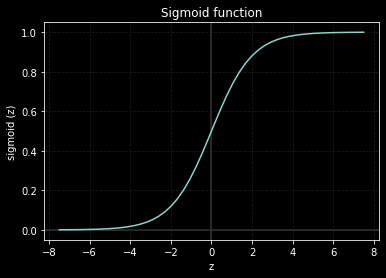

In [89]:
z = np.linspace(-7.5, 7.5)
a = sigmoid(z)

plt.style.use("dark_background")
plt.axhline(c='.2'), plt.axvline(c='.2')
plt.grid(ls="--", c='.1')

plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigmoid (z)")

plt.plot(z, a);

In [92]:
def neuron(x: list, w: list, b: numeric) -> numeric:
    z = linear_neuron(x, w, b)
    a = sigmoid(z)

    return a

In [93]:
neuron(x, w, 1)

0.9999998874648379

In [94]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [95]:
my_x_collection

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [96]:
def or_neuron(x: list) -> list:
    a = []

    for pair in x:
        if sum(pair) > 0:
            a.append(pair)
            
    return a        

In [97]:
or_neuron(my_x_collection)

[[0, 1], [1, 0], [1, 1]]

In [98]:
def and_neuron(x: list) -> list:
    a = []

    for pair in x:
        if sum(pair) == 2:
            a.append(pair)


    return a           

In [99]:
and_neuron(my_x_collection)

[[1, 1]]

In [119]:
def not_neuron(x: list) -> list:
    a = []

    for pair in x:
        a.append([
            int(not pair[0]),
            int(not pair[1])
        ])
    return a    

In [120]:
not_neuron(my_x_collection)

[[1, 1], [1, 0], [0, 1], [0, 0]]

In [113]:
not bool(1)

False

In [114]:
not 1

False

In [115]:
not 0

True

In [123]:
def xor_neuron(x: list) -> list:
    a = []

    for pair in x:
        a.append(
            1 if sum(pair) == 1 else 0
        )

    return a    

In [124]:
xor_neuron(my_x_collection)

[0, 1, 1, 0]

In [125]:
def half_adder(x: list) -> list:
    and_out = and_neuron(x)
    xor_out = xor_neuron(x)

    return and_out, xor_out


In [126]:
half_adder(my_x_collection)

([[1, 1]], [0, 1, 1, 0])